In [1]:
# importing useful packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
# making df of zillow housing data
df = pd.read_csv("Data/zillow_index.csv")
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
5,40326,5,Phoenix,city,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",Maricopa County,121786.0,122161.0,...,386475.0,391408.0,398975.0,406917.0,416954.0,424696.0,430372.0,428097.0,422019.0,413234.0
6,13271,6,Philadelphia,city,PA,PA,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,74705.0,74913.0,...,229457.0,229893.0,230282.0,230871.0,231866.0,233744.0,235810.0,237364.0,238641.0,239856.0
7,18959,7,Las Vegas,city,NV,NV,"Las Vegas-Henderson-Paradise, NV",Clark County,163456.0,163436.0,...,386716.0,396287.0,406330.0,417940.0,426638.0,434909.0,440268.0,441936.0,439130.0,433373.0
8,54296,8,San Diego,city,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,224292.0,225685.0,...,870773.0,892731.0,915085.0,940519.0,961875.0,976489.0,977085.0,966561.0,956608.0,950455.0
9,38128,9,Dallas,city,TX,TX,"Dallas-Fort Worth-Arlington, TX",Dallas County,119344.0,119508.0,...,291386.0,295947.0,302528.0,309201.0,317293.0,323657.0,329811.0,332004.0,332920.0,328711.0


In [3]:
# This is a large df. We will frame a df by the four largest cities
df4 = df.loc[0:3].copy()
df4.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [4]:
# Now we need to melt to longform data
dfm = pd.melt(df4.drop(columns=['SizeRank','RegionType','StateName','RegionID']),
              id_vars=['RegionName','State','Metro','CountyName'],
              value_name='Confirmed',var_name="Date")
dfm.head()

,RegionName,State,Metro,CountyName,Date,Confirmed
0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0


In [5]:
# Fortunately the melted dates are already datetime format. 
dfm['Date'] = pd.to_datetime(dfm['Date'])
dfm.head(3)

,RegionName,State,Metro,CountyName,Date,Confirmed
0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0


In [6]:
# Making 'Date' index
dfm = dfm.set_index("Date")
dfm.head()

,RegionName,State,Metro,CountyName,Confirmed
Date,,,,,
2000-01-31,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


In [7]:
#Resampling the dataframe as monthly frequency, grouped by City
res = dfm.groupby('RegionName').resample("MS").sum()
res

C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_18376\2413772243.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res = dfm.groupby('RegionName').resample("MS").sum()


Confirmed
RegionName Date                 
Chicago    2000-01-01   166139.0
           2000-02-01   166536.0
           2000-03-01   167368.0
           2000-04-01   168826.0
           2000-05-01   170499.0
...                          ...
New York   2022-05-01   768797.0
           2022-06-01   773944.0
           2022-07-01   777692.0
           2022-08-01   779960.0
           2022-09-01   781622.0

[1092 rows x 1 columns]

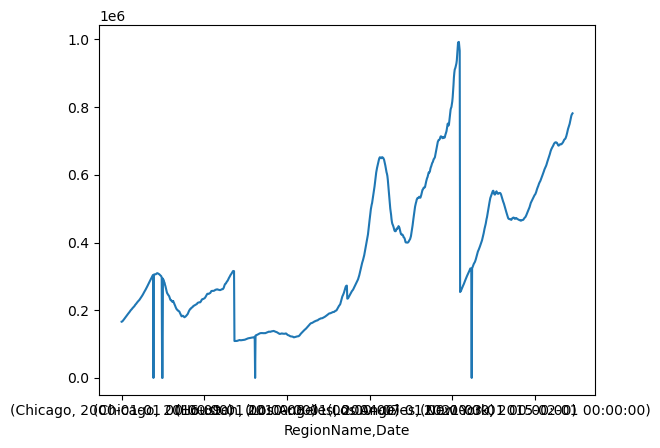

In [8]:
# Trying to plot
ax = res['Confirmed'].plot()

In [9]:
# Indecipherable X axis. Unstacking to clarify
unstacked = res.unstack(level=0)
unstacked 

Confirmed                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [10]:
def thousands(x,pos):
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Creating formatter
fmt_thous = mticks.FuncFormatter(thousands)

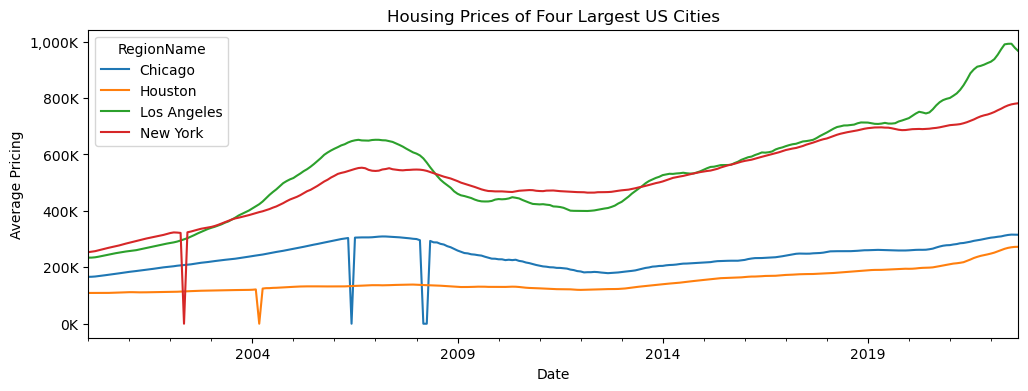

In [11]:
# Now plotting again
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
ax = unstacked['Confirmed'].plot()
ax.set(title="Housing Prices of Four Largest US Cities", xlabel="Date", ylabel="Average Pricing")
ax.yaxis.set_major_formatter(fmt_thous);

1. Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [12]:
# Slicing December to view averages
unstacked.loc['2008-12']

Confirmed                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-12-01  265306.0  131283.0    469294.0  510309.0

### New York is highest at 510309 with Houston lowest at 131283

2. How much did the home values change from November 2008 to December 2008 (in dollars)?

In [13]:
change = unstacked.loc['2008-11':'2008-12']
change_diff = change.diff()
change_diff

Confirmed                             
RegionName   Chicago Houston Los Angeles New York
Date                                             
2008-11-01       NaN     NaN         NaN      NaN
2008-12-01   -5753.0  -964.0    -12611.0  -4458.0

# Gridsearch SARIMA Models

## Objective: forecast the home values for the city with the highest home value in 2008(New York) 6months into the future (beyond the dataset).

### Filter the dataset only to include values starting in 2018

In [20]:
unstacked

Confirmed                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [41]:
# We only want data from 2018 onward from New York
ts = unstacked.loc['2018':]
ts.head()

Confirmed                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2018-01-01  254397.0  178763.0    677868.0  656700.0
2018-02-01  256564.0  179315.0    684769.0  661012.0
2018-03-01  256995.0  179901.0    691712.0  665672.0
2018-04-01  257112.0  180859.0    697356.0  669989.0
2018-05-01  257174.0  181862.0    699877.0  673514.0

In [48]:
ts.columns

MultiIndex([('Confirmed',     'Chicago'),
            ('Confirmed',     'Houston'),
            ('Confirmed', 'Los Angeles'),
            ('Confirmed',    'New York')],
           names=[None, 'RegionName'])

In [53]:
ny = ts.loc[:,('Confirmed',    'New York')]
ny

Date
2018-01-01    656700.0
2018-02-01    661012.0
2018-03-01    665672.0
2018-04-01    669989.0
2018-05-01    673514.0
2018-06-01    676434.0
2018-07-01    678984.0
2018-08-01    681140.0
2018-09-01    683546.0
2018-10-01    685588.0
2018-11-01    688553.0
2018-12-01    691226.0
2019-01-01    693208.0
2019-02-01    694425.0
2019-03-01    695720.0
2019-04-01    695824.0
2019-05-01    696173.0
2019-06-01    695186.0
2019-07-01    695010.0
2019-08-01    692926.0
2019-09-01    690189.0
2019-10-01    687693.0
2019-11-01    686304.0
2019-12-01    686650.0
2020-01-01    688073.0
2020-02-01    689697.0
2020-03-01    690055.0
2020-04-01    690520.0
2020-05-01    689921.0
2020-06-01    690785.0
2020-07-01    691384.0
2020-08-01    693097.0
2020-09-01    694261.0
2020-10-01    696260.0
2020-11-01    698929.0
2020-12-01    701899.0
2021-01-01    703956.0
2021-02-01    705003.0
2021-03-01    706066.0
2021-04-01    707633.0
2021-05-01    710706.0
2021-06-01    714507.0
2021-07-01    719155.0
2021-0

### Check for and address null values.

In [54]:
# Checking nulls
ny.isna().sum()

0

### Decompose the Time series to detect seasonality and decide if your model should or should not have a seasonal component

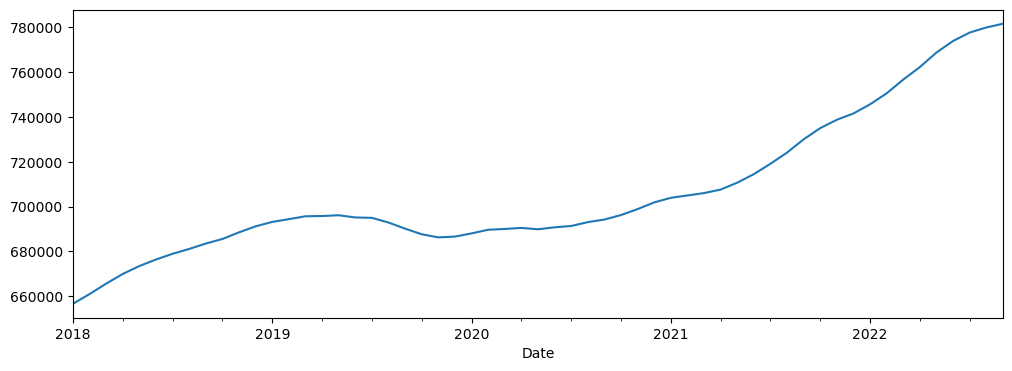

In [55]:
# Making basic plot
ny.plot();

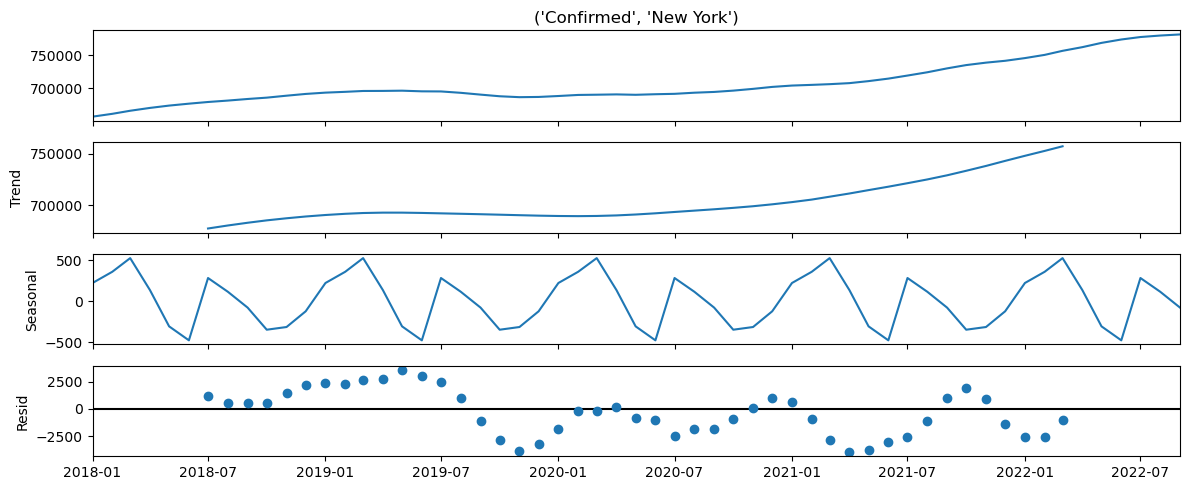

In [56]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(ny)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

##### Data to inconsistent for seasonality

### Determine Time Series Model Orders

### Check the time series for stationarity.

In [57]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [58]:
# Testing the raw data for stationarity
get_adfuller_results(ny)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,0.407572,4,52,0.981776,0.05,False


### Determine the number of differencing needed to make the data stationary

In [94]:
from pmdarima.arima.utils import ndiffs, nsdiffs
# Using ndiffs to see if differencing is required (nonseasonal)
d = ndiffs(ny)
print (f'd = {d}')

d = 2


In [96]:
# Determine D
D = nsdiffs(ny, m =12)
print(f'D = {D}')

D = 0


### Check the ACF/PACF Plots of the differenced data to determine the orders

In [61]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()
    
    return fig

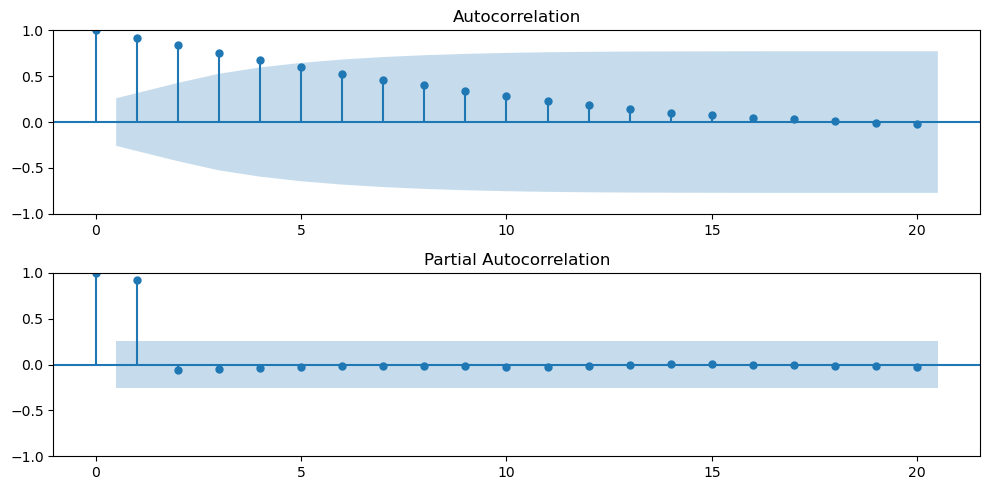

In [64]:
plot_acf_pacf(ny, nlags=20);

### Split the time series into training and test data (Remember we want to predict 6 months, and our data has been resampled to monthly)

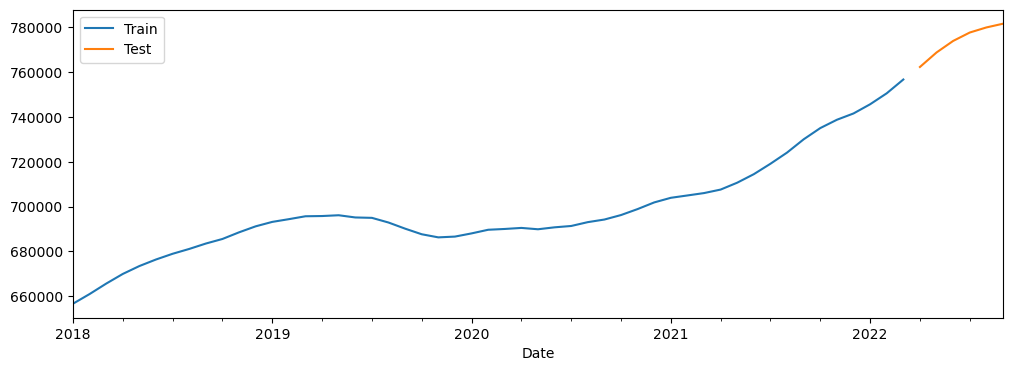

In [67]:
from pmdarima.model_selection import train_test_split
# We're predicting six months with monthly data, so 6 lags
test_lags = 6 
train, test = train_test_split(ny, test_size = test_lags)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

### Fit a manual ARIMA/SARIMA model based on the orders determined during your exploration.

In [68]:
# Making ARIMA as data is nonseasonal
p = 1  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 0  # nonseasonal MA

arima = tsa.ARIMA(train, order = (p,d,q)).fit()

# Obtain summary
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     ('Confirmed', 'New York')   No. Observations:                   51
Model:                        ARIMA(1, 2, 0)   Log Likelihood                -402.198
Date:                       Thu, 11 Jan 2024   AIC                            808.395
Time:                               15:42:08   BIC                            812.179
Sample:                           01-01-2018   HQIC                           809.831
                                - 03-01-2022                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0014      0.097     -0.014      0.988      -0.191       0.188
sigma2      7.852e+05    2.2e+05      3.564      0.000    3.53e+05    1.22e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.25   Prob(JB):                         0.39
Heteroskedasticity (H):               2.03   Skew:                            -0.02
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make forecasts with your model.

### Plot the forecasts versus the test data

### Obtain metrics for evaluation

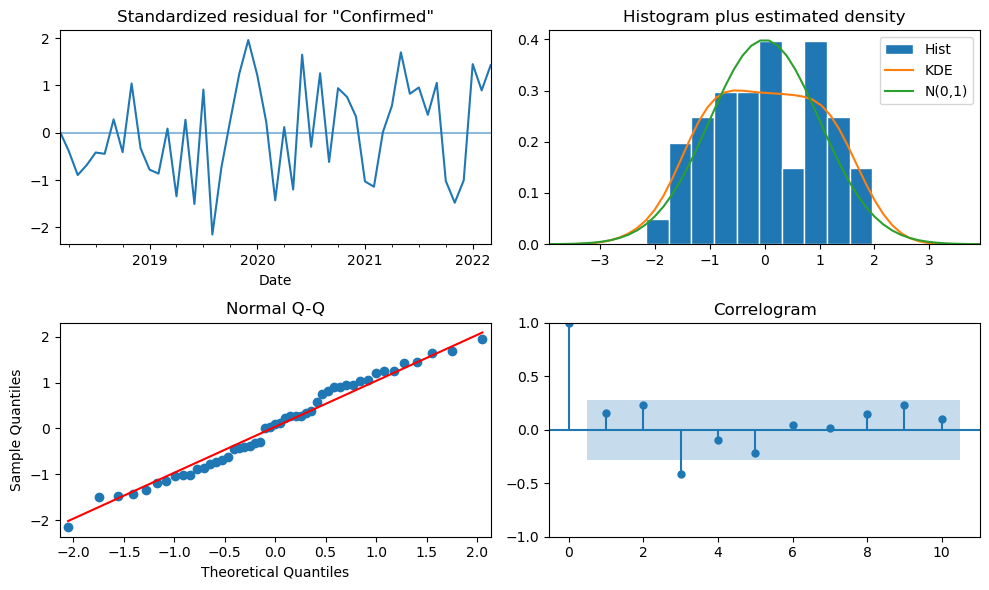

In [69]:
# Obtain diagnostic plots
fig = arima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

In [70]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 4,217.822
- MSE = 36,194,677.245
- RMSE = 6,016.201
- R^2 = 0.198
- MAPE = 0.54%


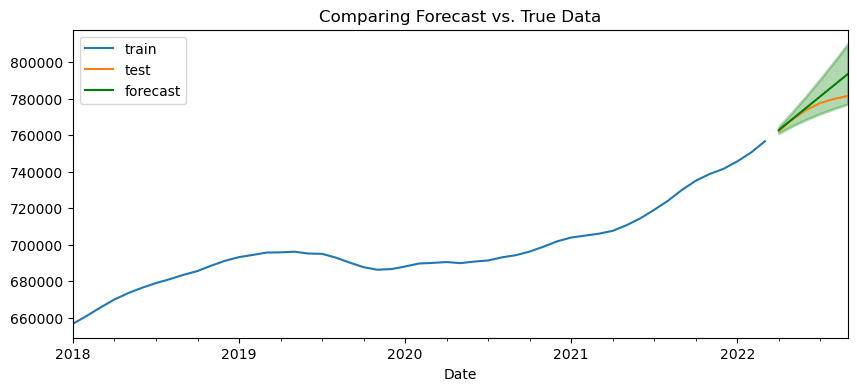

In [72]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = arima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

### Make forecasts with the auto_arima model

In [87]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1040.347, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=909.717, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=930.102, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=912.587, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=940.569, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=911.717, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=911.717, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=913.717, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=928.324, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=910.593, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=907.207, Time=0.16 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=909.209, Time=0.83 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1024.876, Time=0.18 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=911.335, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[12] interc

In [88]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
print(auto_model.seasonal_order)

(1, 1, 1)
(0, 0, 0, 12)


### Fit a model on training data with the best parameters from auto_arima

In [89]:
# We will now include a seasonal component
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     ('Confirmed', 'New York')   No. Observations:                   51
Model:                        ARIMA(1, 1, 1)   Log Likelihood                -452.949
Date:                       Thu, 11 Jan 2024   AIC                            911.898
Time:                               16:57:24   BIC                            917.634
Sample:                           01-01-2018   HQIC                           914.082
                                - 03-01-2022                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.008    122.642      0.000       0.984       1.016
ma.L1         -0.9996      0.073    -13.656      0.000      -1.143      -0.856
sigma2      4.315e+06   4.01e-09   1.08e+15      0.000    4.32e+06    4.32e+06
===================================================================================
Ljung-Box (L1) (Q):                  39.10   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.00   Prob(JB):                         0.77
Heteroskedasticity (H):               2.15   Skew:                            -0.20
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.76e+29. Standard errors may be unstable.
"""

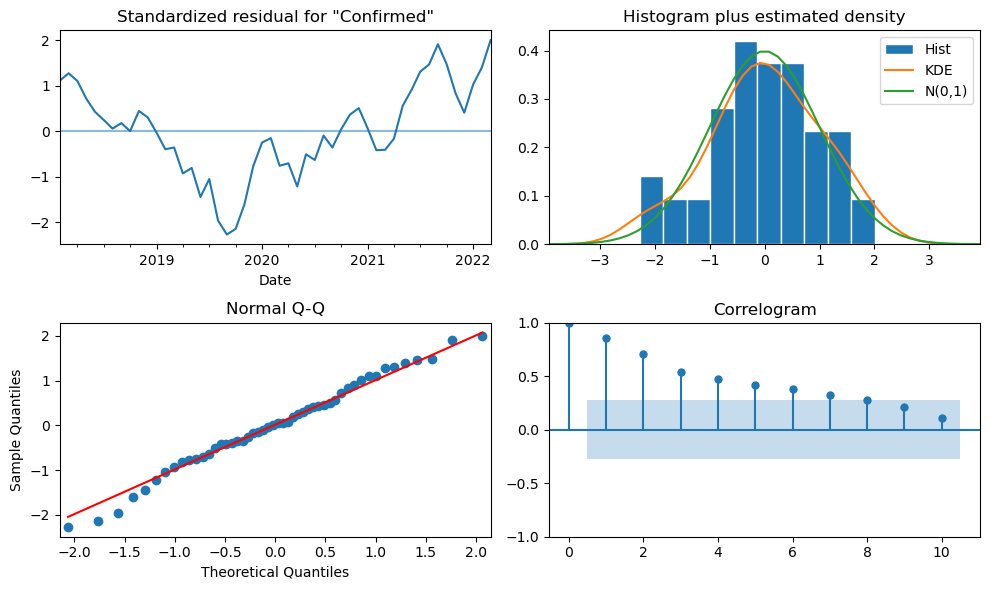

In [90]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

### Plot the forecasts versus the test data

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 10,336.391
- MSE = 119,088,166.132
- RMSE = 10,912.752
- R^2 = -1.640
- MAPE = 1.33%


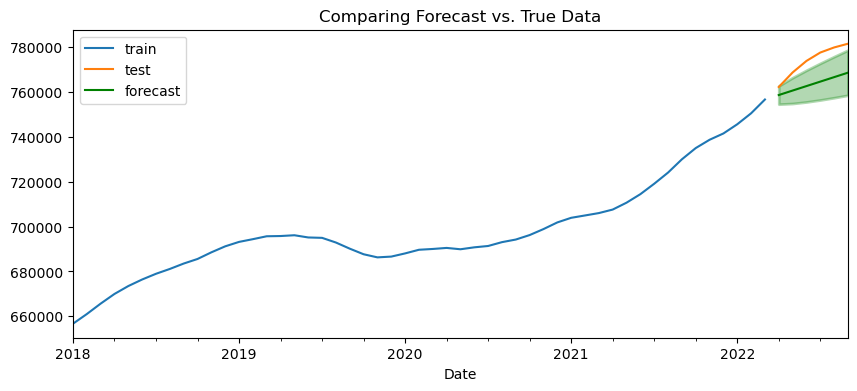

In [91]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df)
# Obtain metrics
regression_metrics_ts(test, forecast_df["mean"])

### Select your final model

##### The first nonseasonal model works a little better than the second but still not great

### Make true future forecasts using the entire dataset (for dates beyond the entire ts).

In [92]:
# It's important not to make predictions further than the length of the test data
len(test)

6

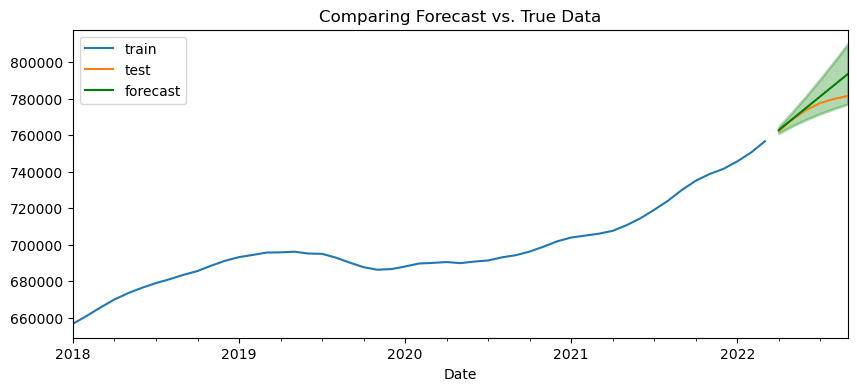

In [97]:
# Obtain future forecasts beyond test data
forecast_df  = arima.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);

### Calculate the predicted net change in home value for the forecasted period as both:

### Raw values for change in the final month in the forecast vs. the first month.

In [98]:
forecast_df.index[0],forecast_df.index[-1]

(Timestamp('2022-04-01 00:00:00', freq='MS'),
 Timestamp('2022-09-01 00:00:00', freq='MS'))

In [99]:
starting_value = forecast_df['mean'].iloc[0]
starting_value

762888.2331520646

In [100]:
final_value = forecast_df['mean'].iloc[-1]
final_value

793659.4112472942

In [101]:
change = final_value - starting_value
change

30771.178095229552

In [102]:
perc_change = (change / starting_value) * 100
perc_change

4.033510645208236

### Convert the raw delta in the following question

1. 
What is the predicted home value in New York City 6 months into the future (beyond the datase)?t **$793,659.41**)

2. 
What is the percent change in home values in New York City by the end of the 6-month forecast (beyond the datast)?e **4.03%**